In [52]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
loan_data_preprocessed_backup = pd.read_csv('loan_data_2007_2014_preprocessed.csv')

In [4]:
loan_data_preprocessed = loan_data_preprocessed_backup.copy()

# Dependent Variable

In [5]:
loan_data_defaults = loan_data_preprocessed[loan_data_preprocessed['loan_status'].isin(['Charged Off','Does not meet the credit policy. Status:Charged Off'])]

#### Notes:
- Exposure At default is proportion of amount left to be paid by total funded amount
- Credit Conversion Factor (CCF) = (Amount Funded - Total principal paid (that includes the recoveries in the end))/Amount Funded 
- EAD = total funded amount * CCF

In [6]:
loan_data_defaults['CCF'] = (loan_data_defaults['funded_amnt'] - loan_data_defaults['total_rec_prncp'])/loan_data_defaults['funded_amnt']

In [7]:
loan_data_defaults['CCF'].describe()

count    43236.000000
mean         0.735952
std          0.200742
min          0.000438
25%          0.632088
50%          0.789908
75%          0.888543
max          1.000000
Name: CCF, dtype: float64

# Data Preparation Train & Test

In [10]:
from sklearn.model_selection import train_test_split

ead_inputs_train, ead_inputs_test, ead_targets_train,ead_targets_test = train_test_split(loan_data_defaults.drop(columns = ['good_bad','CCF'],axis = 1)
                                                                                                                         ,loan_data_defaults['CCF'],test_size= 0.2,random_state=42)

## Train Data Preparation

In [11]:
ead_inputs_prep = ead_inputs_train.copy()

In [12]:
print(ead_inputs_prep.shape)
ead_inputs_prep.head()

(34588, 208)


,Unnamed: 0.1,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,...,addr_state:TX,addr_state:UT,addr_state:VA,addr_state:VT,addr_state:WA,addr_state:WI,addr_state:WV,addr_state:WY,initial_list_status:f,initial_list_status:w
165859,165859,165859,3108794,3781392,13550,13550,13550.0,36 months,18.49,493.21,...,0,0,0,0,0,0,0,0,0,1
213563,213563,213563,1344077,1588657,3000,3000,3000.0,36 months,14.65,103.49,...,0,0,0,0,0,0,0,0,1,0
182682,182682,182682,2284984,2707166,3500,3500,3500.0,36 months,17.77,126.13,...,0,0,0,0,1,0,0,0,1,0
81769,81769,81769,7629442,9311362,6625,6625,6625.0,36 months,17.10,236.53,...,0,0,0,0,0,0,0,0,0,1
74862,74862,74862,8136079,9878144,18450,18450,18450.0,60 months,21.70,506.43,...,0,0,0,0,0,0,0,0,1,0


In [13]:
features_to_consider =[
'grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:MORTGAGE',
'home_ownership:NONE',
'home_ownership:OTHER',
'home_ownership:OWN',
'home_ownership:RENT',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:car',
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:educational',
'purpose:home_improvement',
'purpose:house',
'purpose:major_purchase',
'purpose:medical',
'purpose:moving',
'purpose:other',
'purpose:renewable_energy',
'purpose:small_business',
'purpose:vacation',
'purpose:wedding',
'initial_list_status:f',
'initial_list_status:w',
'term_int',
'emp_length_int',
'mths_since_issue_d',
'mths_since_earliest_cr_line',
'funded_amnt',
'int_rate',
'installment',
'annual_inc',
'dti',
'delinq_2yrs',
'inq_last_6mths',
'mths_since_last_delinq',
'mths_since_last_record',
'open_acc',
'pub_rec',
'total_acc',
'acc_now_delinq',
'total_rev_hi_lim'
]

In [14]:
features_reference_cat = ['grade:G',
'home_ownership:RENT',
'verification_status:Verified',
'purpose:credit_card',
'initial_list_status:f']

In [15]:
ead_inputs_prep = ead_inputs_prep[features_to_consider]

In [16]:
ead_inputs_prep.drop(columns= features_reference_cat, inplace= True)

In [17]:
ead_inputs_prep.drop(columns='funded_amnt', inplace= True)

In [18]:
print(ead_inputs_prep.shape)
ead_inputs_prep.head()

(34588, 43)


,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:MORTGAGE,home_ownership:NONE,home_ownership:OTHER,home_ownership:OWN,...,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,total_acc,acc_now_delinq,total_rev_hi_lim
165859,0,0,0,1,0,0,0,0,0,0,...,26.31,0.0,2.0,NaN,NaN,17.0,0.0,34.0,0.0,13700.0
213563,0,0,1,0,0,0,0,0,0,0,...,27.21,0.0,3.0,NaN,NaN,11.0,0.0,13.0,0.0,3000.0
182682,0,0,0,1,0,0,0,0,0,0,...,20.33,0.0,1.0,NaN,NaN,7.0,0.0,38.0,0.0,14600.0
81769,0,0,1,0,0,0,1,0,0,0,...,17.31,0.0,0.0,NaN,68.0,12.0,2.0,30.0,0.0,5800.0
74862,0,0,0,0,1,0,0,0,0,0,...,24.28,0.0,0.0,72.0,NaN,13.0,0.0,35.0,0.0,15900.0


In [19]:
# Checking constant columns

constant_columns = []

for cols in ead_inputs_prep.columns:
    if ead_inputs_prep[cols].nunique() == 1:
        constant_columns.append(cols)
        
print('Number of Constant Columns :',len(constant_columns))
print(constant_columns)


Number of Constant Columns : 0
[]


In [20]:
# Handling NAs

variables = [ cols for cols in ead_inputs_prep.columns]
NA_cols = []

for cols in ead_inputs_prep.columns:
    NA_cols.append(ead_inputs_prep[cols].isna().sum())

na_summary = pd.DataFrame({
    'Variables': variables,
    '#NA': NA_cols
}
)
na_summary['%NAs'] = (na_summary['#NA']/ead_inputs_prep.shape[0])*100

na_summary

,Variables,#NA,%NAs
0,grade:A,0,0.000000
1,grade:B,0,0.000000
2,grade:C,0,0.000000
3,grade:D,0,0.000000
4,grade:E,0,0.000000
5,grade:F,0,0.000000
6,home_ownership:MORTGAGE,0,0.000000
7,home_ownership:NONE,0,0.000000
8,home_ownership:OTHER,0,0.000000
9,home_ownership:OWN,0,0.000000


In [21]:
ead_inputs_prep.drop(columns= ['mths_since_last_delinq','mths_since_last_record'], inplace= True)

In [22]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Add a constant column for intercept in the VIF calculation
X = add_constant(ead_inputs_prep)

# Calculate VIF for each variable
vif_data = pd.DataFrame({
    'Variable': X.columns,
    'VIF Value': [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
})

# Remove the constant from the VIF dataframe
vif_data = vif_data[vif_data['Variable'] != 'const']

# Display the VIF values
vif_data

,Variable,VIF Value
1,grade:A,12.800563
2,grade:B,25.726951
3,grade:C,22.659471
4,grade:D,15.342118
5,grade:E,8.432469
6,grade:F,4.321532
7,home_ownership:MORTGAGE,1.290459
8,home_ownership:NONE,1.001203
9,home_ownership:OTHER,1.008961
10,home_ownership:OWN,1.105695


In [23]:
X_train = ead_inputs_prep

In [24]:
print(X_train.shape)
X_train.head()

(34588, 41)


,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:MORTGAGE,home_ownership:NONE,home_ownership:OTHER,home_ownership:OWN,...,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,total_acc,acc_now_delinq,total_rev_hi_lim
165859,0,0,0,1,0,0,0,0,0,0,...,493.21,38000.0,26.31,0.0,2.0,17.0,0.0,34.0,0.0,13700.0
213563,0,0,1,0,0,0,0,0,0,0,...,103.49,40000.0,27.21,0.0,3.0,11.0,0.0,13.0,0.0,3000.0
182682,0,0,0,1,0,0,0,0,0,0,...,126.13,53000.0,20.33,0.0,1.0,7.0,0.0,38.0,0.0,14600.0
81769,0,0,1,0,0,0,1,0,0,0,...,236.53,42000.0,17.31,0.0,0.0,12.0,2.0,30.0,0.0,5800.0
74862,0,0,0,0,1,0,0,0,0,0,...,506.43,69000.0,24.28,0.0,0.0,13.0,0.0,35.0,0.0,15900.0


In [25]:
y_train = ead_targets_train

In [26]:
print(y_train.shape)
y_train.head()

(34588,)


165859    0.775328
213563    0.909403
182682    0.423626
81769     0.535653
74862     0.763413
Name: CCF, dtype: float64

## Test Data Preparation

In [27]:
ead_inputs_prep = ead_inputs_test.copy()

In [28]:
print(ead_inputs_prep.shape)
ead_inputs_prep.head()

(8648, 208)


,Unnamed: 0.1,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,...,addr_state:TX,addr_state:UT,addr_state:VA,addr_state:VT,addr_state:WA,addr_state:WI,addr_state:WV,addr_state:WY,initial_list_status:f,initial_list_status:w
178928,178928,178928,2382805,2845549,10100,10100,10100.0,36 months,18.49,367.63,...,0,0,0,0,0,0,0,0,0,1
69814,69814,69814,8597067,10349097,9000,9000,8950.0,36 months,7.90,281.62,...,0,0,0,0,0,0,0,0,1,0
101396,101396,101396,6715387,8317631,6000,6000,5950.0,60 months,24.50,174.36,...,0,0,0,0,0,0,0,0,1,0
463268,463268,463268,10111118,11962523,19550,19550,19525.0,36 months,7.62,609.21,...,0,0,0,0,0,0,0,0,1,0
253729,253729,253729,34423403,37086751,18650,18650,18650.0,36 months,15.99,655.59,...,0,0,0,0,0,0,0,0,1,0


In [29]:
features_to_consider =[
'grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:MORTGAGE',
'home_ownership:NONE',
'home_ownership:OTHER',
'home_ownership:OWN',
'home_ownership:RENT',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:car',
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:educational',
'purpose:home_improvement',
'purpose:house',
'purpose:major_purchase',
'purpose:medical',
'purpose:moving',
'purpose:other',
'purpose:renewable_energy',
'purpose:small_business',
'purpose:vacation',
'purpose:wedding',
'initial_list_status:f',
'initial_list_status:w',
'term_int',
'emp_length_int',
'mths_since_issue_d',
'mths_since_earliest_cr_line',
'funded_amnt',
'int_rate',
'installment',
'annual_inc',
'dti',
'delinq_2yrs',
'inq_last_6mths',
'mths_since_last_delinq',
'mths_since_last_record',
'open_acc',
'pub_rec',
'total_acc',
'acc_now_delinq',
'total_rev_hi_lim'
]

In [30]:
features_reference_cat = ['grade:G',
'home_ownership:RENT',
'verification_status:Verified',
'purpose:credit_card',
'initial_list_status:f']

In [31]:
ead_inputs_prep = ead_inputs_prep[features_to_consider]

In [32]:
ead_inputs_prep.drop(columns= features_reference_cat, inplace= True)

In [33]:
ead_inputs_prep.drop(columns='funded_amnt', inplace= True)

In [34]:
print(ead_inputs_prep.shape)
ead_inputs_prep.head()

(8648, 43)


,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:MORTGAGE,home_ownership:NONE,home_ownership:OTHER,home_ownership:OWN,...,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,total_acc,acc_now_delinq,total_rev_hi_lim
178928,0,0,0,1,0,0,1,0,0,0,...,21.69,0.0,3.0,54.0,NaN,10.0,0.0,25.0,0.0,8400.0
69814,1,0,0,0,0,0,0,0,0,0,...,7.75,0.0,0.0,NaN,NaN,5.0,0.0,9.0,0.0,5600.0
101396,0,0,0,0,0,1,0,0,0,0,...,21.99,1.0,0.0,12.0,97.0,9.0,1.0,16.0,0.0,21900.0
463268,1,0,0,0,0,0,0,0,0,0,...,12.45,0.0,0.0,NaN,NaN,12.0,0.0,27.0,0.0,20100.0
253729,0,0,0,1,0,0,0,0,0,1,...,19.51,0.0,2.0,36.0,NaN,20.0,0.0,32.0,0.0,80400.0


In [35]:
# Checking constant columns

constant_columns = []

for cols in ead_inputs_prep.columns:
    if ead_inputs_prep[cols].nunique() == 1:
        constant_columns.append(cols)
        
print('Number of Constant Columns :',len(constant_columns))
print(constant_columns)


Number of Constant Columns : 0
[]


In [36]:
# Handling NAs

variables = [ cols for cols in ead_inputs_prep.columns]
NA_cols = []

for cols in ead_inputs_prep.columns:
    NA_cols.append(ead_inputs_prep[cols].isna().sum())

na_summary = pd.DataFrame({
    'Variables': variables,
    '#NA': NA_cols
}
)
na_summary['%NAs'] = (na_summary['#NA']/ead_inputs_prep.shape[0])*100

na_summary

,Variables,#NA,%NAs
0,grade:A,0,0.000000
1,grade:B,0,0.000000
2,grade:C,0,0.000000
3,grade:D,0,0.000000
4,grade:E,0,0.000000
5,grade:F,0,0.000000
6,home_ownership:MORTGAGE,0,0.000000
7,home_ownership:NONE,0,0.000000
8,home_ownership:OTHER,0,0.000000
9,home_ownership:OWN,0,0.000000


In [37]:
ead_inputs_prep.drop(columns= ['mths_since_last_delinq','mths_since_last_record'], inplace= True)

In [38]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Add a constant column for intercept in the VIF calculation
X = add_constant(ead_inputs_prep)

# Calculate VIF for each variable
vif_data = pd.DataFrame({
    'Variable': X.columns,
    'VIF Value': [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
})

# Remove the constant from the VIF dataframe
vif_data = vif_data[vif_data['Variable'] != 'const']

# Display the VIF values
vif_data

,Variable,VIF Value
1,grade:A,12.373519
2,grade:B,25.138368
3,grade:C,22.608577
4,grade:D,15.034716
5,grade:E,8.146877
6,grade:F,4.069669
7,home_ownership:MORTGAGE,1.273782
8,home_ownership:NONE,1.003704
9,home_ownership:OTHER,1.003926
10,home_ownership:OWN,1.106857


In [39]:
X_test = ead_inputs_prep

In [40]:
print(X_test.shape)
X_test.head()

(8648, 41)


,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:MORTGAGE,home_ownership:NONE,home_ownership:OTHER,home_ownership:OWN,...,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,total_acc,acc_now_delinq,total_rev_hi_lim
178928,0,0,0,1,0,0,1,0,0,0,...,367.63,30000.0,21.69,0.0,3.0,10.0,0.0,25.0,0.0,8400.0
69814,1,0,0,0,0,0,0,0,0,0,...,281.62,52000.0,7.75,0.0,0.0,5.0,0.0,9.0,0.0,5600.0
101396,0,0,0,0,0,1,0,0,0,0,...,174.36,67000.0,21.99,1.0,0.0,9.0,1.0,16.0,0.0,21900.0
463268,1,0,0,0,0,0,0,0,0,0,...,609.21,65478.0,12.45,0.0,0.0,12.0,0.0,27.0,0.0,20100.0
253729,0,0,0,1,0,0,0,0,0,1,...,655.59,65000.0,19.51,0.0,2.0,20.0,0.0,32.0,0.0,80400.0


In [41]:
y_test = ead_targets_test

In [42]:
print(y_test.shape)
y_test.head()

(8648,)


178928    0.512662
69814     0.692654
101396    0.789353
463268    0.638038
253729    0.817017
Name: CCF, dtype: float64

# Model Development

## OLS Model

In [43]:
import statsmodels.api as sm

X_train = sm.add_constant(X_train)  # Adds a constant term to the predictor

# Fit the model
model = sm.OLS(y_train, X_train).fit()

# Print the summary of the regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    CCF   R-squared:                       0.270
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     311.7
Date:                Thu, 14 Nov 2024   Prob (F-statistic):               0.00
Time:                        21:33:48   Log-Likelihood:                 11943.
No. Observations:               34588   AIC:                        -2.380e+04
Df Residuals:                   34546   BIC:                        -2.345e+04
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

In [44]:
columns_to_drop = [
    'home_ownership:MORTGAGE',
    'home_ownership:NONE',
    'home_ownership:OTHER',
    'home_ownership:OWN',
    'installment',
    'annual_inc',
    'delinq_2yrs',
    'pub_rec',
    'acc_now_delinq'
]

X_train.drop(columns=columns_to_drop,inplace= True)
X_test.drop(columns= columns_to_drop, inplace = True)

In [45]:
import statsmodels.api as sm

X_train = sm.add_constant(X_train)  # Adds a constant term to the predictor

# Fit the model
model = sm.OLS(y_train, X_train).fit()

# Print the summary of the regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    CCF   R-squared:                       0.270
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     398.9
Date:                Thu, 14 Nov 2024   Prob (F-statistic):               0.00
Time:                        21:38:26   Log-Likelihood:                 11936.
No. Observations:               34588   AIC:                        -2.381e+04
Df Residuals:                   34555   BIC:                        -2.353e+04
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

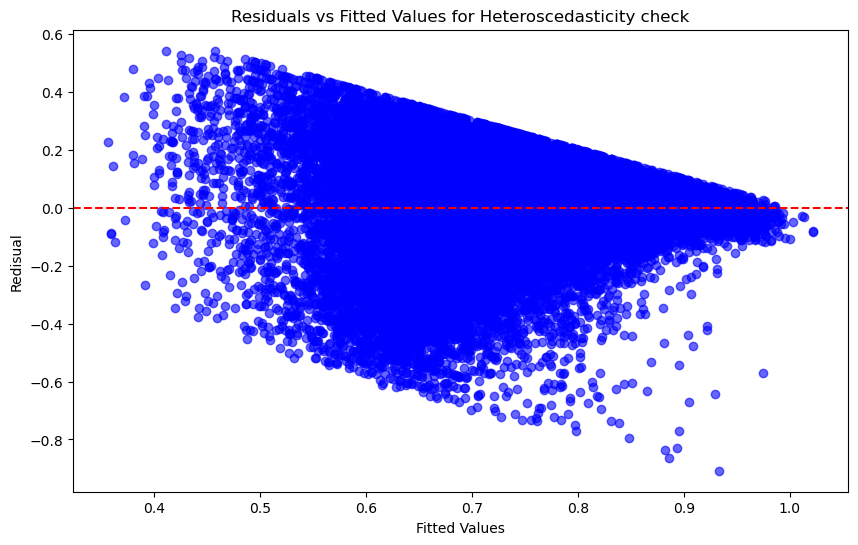

In [46]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

fitted_values = model.fittedvalues
residuals = model.resid


plt.figure(figsize = (10,6))
plt.scatter(fitted_values,residuals,color = 'blue', alpha= 0.6)
plt.axhline(y=0,color = 'red', linestyle = '--')
plt.xlabel('Fitted Values')
plt.ylabel('Redisual')
plt.title('Residuals vs Fitted Values for Heteroscedasticity check')
plt.show()

In [47]:
# Statistical test to check heteroscedasticity : Breusch-Pagan test

from statsmodels.stats.diagnostic import het_breuschpagan


# het_breuschpagan takes residuals and the independent variables as input
bp_test = het_breuschpagan(model.resid, X_train)

# Extracting test results
bp_stat = bp_test[0]  # Breusch-Pagan statistic
p_value = bp_test[1]  # p-value for the test

print("Breusch-Pagan test statistic:", bp_stat)
print("p-value:", p_value)

# Interpretation
if p_value < 0.05:
    print("The test indicates heteroscedasticity (p-value < 0.05).")
else:
    print("The test does not indicate heteroscedasticity (p-value >= 0.05).")

Breusch-Pagan test statistic: 5582.082699597302
p-value: 0.0
The test indicates heteroscedasticity (p-value < 0.05).


In [48]:
# WLS model

import statsmodels.api as sm

# Estimate weights as the inverse of residuals' variance (or any appropriate function)
weights = 1 / model.resid ** 2

# Fit WLS model
wls_model = sm.WLS(y_train, X_train, weights=weights).fit()

In [49]:
print(wls_model.summary())

                            WLS Regression Results                            
Dep. Variable:                    CCF   R-squared:                       1.000
Model:                            WLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.203e+07
Date:                Thu, 14 Nov 2024   Prob (F-statistic):               0.00
Time:                        21:40:17   Log-Likelihood:                 38977.
No. Observations:               34588   AIC:                        -7.789e+04
Df Residuals:                   34555   BIC:                        -7.761e+04
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

## Sklearn: regularization technique

In [50]:
X_train.drop(columns = 'const', inplace = True)

In [51]:
# Grid Search: This will help you decide which alpha value (Lambada) will be best for the model

# Import necessary libraries
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score

# Define the model
lasso_reg = Lasso()

# Define the parameter grid
param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1, 10, 100]  # List of alpha values to try
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=lasso_reg, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters and model
best_params = grid_search.best_params_
ead_model = grid_search.best_estimator_

# Make predictions with the best model
y_pred = ead_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the results
print("Best Parameters:", best_params)
print("Best Model's Mean Squared Error (MSE):", mse)
print("Best Model's R-squared (R2):", r2)
print("Lasso Coefficients:", ead_model.coef_)

Best Parameters: {'alpha': 0.001}
Best Model's Mean Squared Error (MSE): 0.029833254264731247
Best Model's R-squared (R2): 0.26608361942715686
Lasso Coefficients: [-1.35300381e-02 -2.10174104e-02 -3.64259069e-03  0.00000000e+00
  5.05661091e-03  7.09550533e-04  0.00000000e+00  7.75345125e-03
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  7.20455599e-03  0.00000000e+00  6.38157582e-03  0.00000000e+00
  0.00000000e+00  1.31207926e-02  5.13849823e-03 -1.94000296e-03
 -3.71412002e-03 -4.16799986e-05  3.38632316e-03  1.12928796e-04
  1.22538968e-02 -2.19766711e-03  3.69045802e-04  2.09628843e-07]


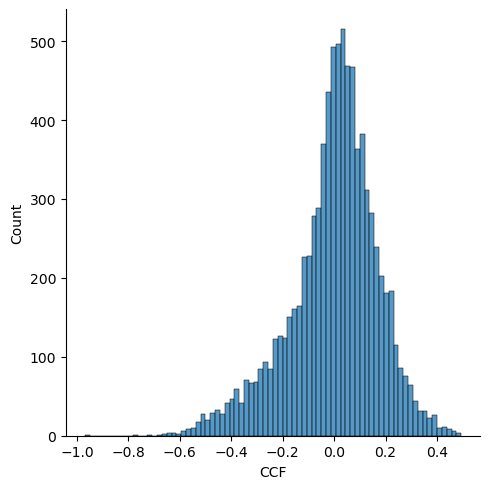

In [53]:
sns.displot(y_test - y_pred)

In [54]:
#Final EAD Features 

EAD_features = X_train.columns.to_list()

In [55]:
EAD_features

['grade:A',
 'grade:B',
 'grade:C',
 'grade:D',
 'grade:E',
 'grade:F',
 'verification_status:Not Verified',
 'verification_status:Source Verified',
 'purpose:car',
 'purpose:debt_consolidation',
 'purpose:educational',
 'purpose:home_improvement',
 'purpose:house',
 'purpose:major_purchase',
 'purpose:medical',
 'purpose:moving',
 'purpose:other',
 'purpose:renewable_energy',
 'purpose:small_business',
 'purpose:vacation',
 'purpose:wedding',
 'initial_list_status:w',
 'term_int',
 'emp_length_int',
 'mths_since_issue_d',
 'mths_since_earliest_cr_line',
 'int_rate',
 'dti',
 'inq_last_6mths',
 'open_acc',
 'total_acc',
 'total_rev_hi_lim']

In [57]:
X_test.columns.to_list()

['grade:A',
 'grade:B',
 'grade:C',
 'grade:D',
 'grade:E',
 'grade:F',
 'verification_status:Not Verified',
 'verification_status:Source Verified',
 'purpose:car',
 'purpose:debt_consolidation',
 'purpose:educational',
 'purpose:home_improvement',
 'purpose:house',
 'purpose:major_purchase',
 'purpose:medical',
 'purpose:moving',
 'purpose:other',
 'purpose:renewable_energy',
 'purpose:small_business',
 'purpose:vacation',
 'purpose:wedding',
 'initial_list_status:w',
 'term_int',
 'emp_length_int',
 'mths_since_issue_d',
 'mths_since_earliest_cr_line',
 'int_rate',
 'dti',
 'inq_last_6mths',
 'open_acc',
 'total_acc',
 'total_rev_hi_lim']

In [56]:
import pickle

pickle.dump(ead_model, open('ead_model.sav','wb'))